<a href="https://colab.research.google.com/github/Belvinbarasa/Eng.barasa/blob/main/FEATURE_ENGINEERING_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install pandas

In [ ]:
!pip install --upgrade seaborn featuretools tpot

In [ ]:
!pip list | grep seaborn

seaborn                            0.13.2


In [ ]:
!pip install --upgrade seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import featuretools as ft
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tpot import TPOTRegressor
from sklearn.datasets import fetch_california_housing

In [ ]:
# Objective: Train a machine learning model on a housing dataset using ensemle learning techniques: Bagging,Boosting and stacking
# Additionallyy, perform automated feature engineering and feature extraction from time series and geospatial data

# load dataset
california =fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target

In [ ]:
# Feature Engineering with FeatureTools
es = ft.EntitySet(id= "housing")
es.add_dataframe(dataframe_name="data", dataframe=df, index="index")
es.add_dataframe(dataframe_name="data", dataframe=df, index="index")
feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name="data", trans_primitives=["add_numeric", "multiply_numeric"])

/usr/local/lib/python3.11/dist-packages/featuretools/entityset/entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/featuretools/entityset/entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/featuretools/synthesis/deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


In [ ]:
# Selecting numerical features and target
x = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup']].dropna()
y = df['Target']

<function matplotlib.pyplot.show(close=None, block=None)>

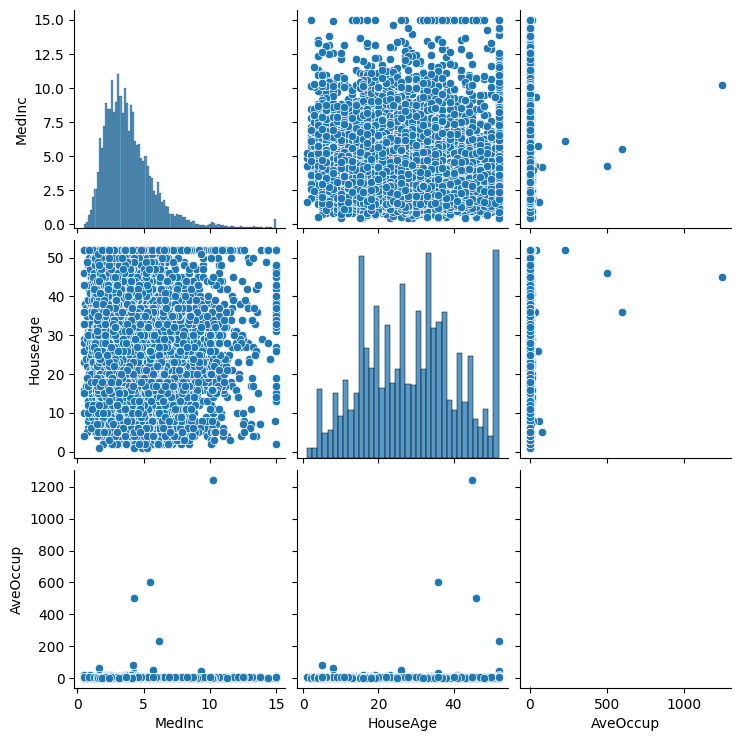

In [ ]:
# Exploratory Data Analysis (EDA)
sns.pairplot(df[['MedInc', 'HouseAge', 'AveOccup']])
plt.show

In [ ]:
# Splirring Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
# Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

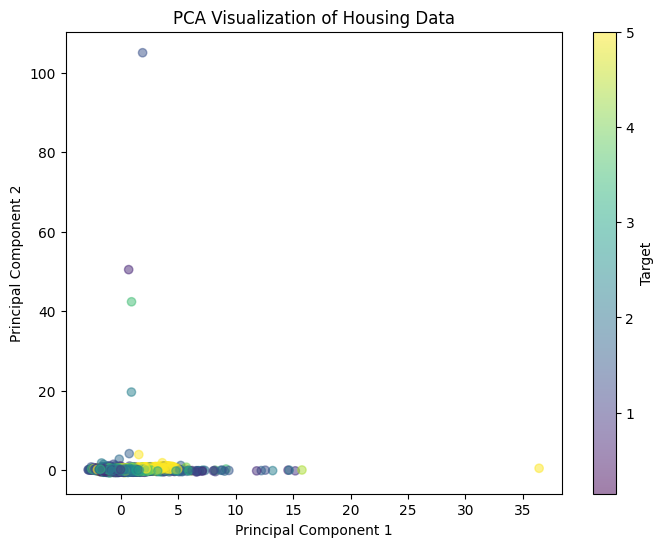

In [ ]:
# PCA Visualization
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Housing Data')
plt.show()

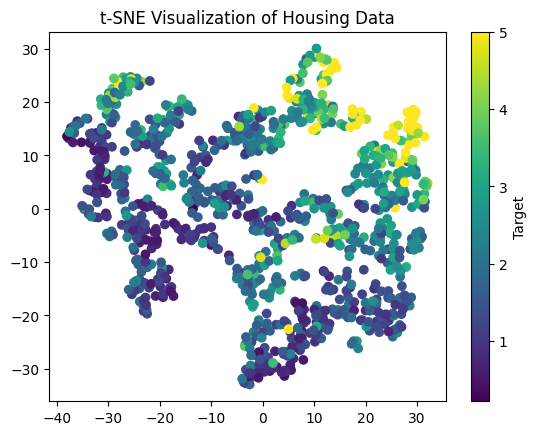

In [ ]:
# Apply t-SNE for Visualization
sample_size = 1000 # Reduce data for t-SNE to avoid computation overload
x_sample, y_sample = x_train[:sample_size], y_train[:sample_size]
tsne = TSNE(n_components=2, random_state=42)
x_train_tsne = tsne.fit_transform(x_sample)
plt.scatter(x_train_tsne[:,0], x_train_tsne[:, 1], c=y_sample, cmap='viridis')
plt.colorbar(label='Target')
plt. title("t-SNE Visualization of Housing Data")
plt.show()

In [ ]:
# Train Ensemble
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_model.fit(x_train, y_train)

boosting_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
boosting_model.fit(x_train, y_train)

stacking_model = StackingRegressor(
    estimators=[('dt', DecisionTreeRegressor()), ('rf', RandomForestRegressor())],
    final_estimator=LinearRegression()
)
stacking_model.fit(x_train, y_train)

StackingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [ ]:
# Train Ensemble models
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_model.fit(x_train_pca, y_train)

boosting_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
boosting_model.fit(x_train_pca, y_train)

stacking_model = StackingRegressor(
    estimators=[('dt', DecisionTreeRegressor()), ('rf', RandomForestRegressor())],
    final_estimator=LinearRegression()
)
stacking_model.fit(x_train_pca, y_train)

StackingRegressor(estimators=[('dt', DecisionTreeRegressor()),
                              ('rf', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [ ]:
# Automated Model Selection with TPOT
tpot = TPOTRegressor(generations=5, population_size=50, random_state=42)
tpot.fit(x_train_pca, y_train)

/usr/local/lib/python3.11/dist-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39323 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:45353
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:39323/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39757'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:36253 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:36253
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:33254
INFO:distributed.scheduler:Receive client connection: Client-645b0483-0567-11f0-81b5-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:33266
ERROR:distributed.core:Exception while handling op scatt

Exception: ModuleNotFoundError("No module named 'numpy._core.numeric'")

In [ ]:
# Automated Model Selection with TPOT
tpot = TPOTRegressor(generations=5, population_size=50, random_state=42)
tpot.fit(x_train_pca, y_train)

/usr/local/lib/python3.11/dist-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39089 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:34087
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:39089/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:35179'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:40281 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:40281
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:54508
INFO:distributed.scheduler:Receive client connection: Client-5eba5528-0567-11f0-81b5-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:54510
ERROR:distributed.core:Exception while handling op scatt

Exception: ModuleNotFoundError("No module named 'numpy._core.numeric'")

In [ ]:
# Model Evaluation
def evaluate_model(model, name):
  y_pred = model.predict(x_test_pca)
  print(f"\n{name} Model Evaluation:")
  print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
  print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
  print("R^2 Score:", r2_score(y_test, y_pred))

evaluate_model(bagging_model, "Bagging")
evaluate_model(boosting_model, "Boosting")
evaluate_model(stacking_model, "Stacking")
evaluate_model(tpot, "TPOT AutoML")


Bagging Model Evaluation:
Mean Absolute Error: 0.7159120632267442
Mean Squared Error: 0.8962375913129419
R^2 Score: 0.31606269020221744

Boosting Model Evaluation:
Mean Absolute Error: 0.7480456782945737
Mean Squared Error: 1.0493336917818799
R^2 Score: 0.19923191216950364

Stacking Model Evaluation:
Mean Absolute Error: 0.7153618770689782
Mean Squared Error: 0.8651217875013443
R^2 Score: 0.3398077990409616


AttributeError: This 'TPOTRegressor' has no attribute 'predict'

In [ ]:
# User Input for Prediction
print("\nEnter feature values for prediction:")
MedInc = float(input("Median Income: "))
HouseAge = float(input("House Age: "))
AveRooms = float(input("Average Rooms: "))
AveOccup = float(input("Average Occupancy: "))

# Preprocessing input and make predictions
user_input = np.array([MedInc, HouseAge, AveRooms, AveOccup]).reshape(1, -1)
user_input = scaler.transform(user_input)
user_input_pca = pca.transform(user_input)

bagging_pred = bagging_model.predict(user_input_pca)
boosting_pred = boosting_model.predict(user_input_pca)
stacking_pred = stacking_model.predict(user_input_pca)

print("\nPredicted Housing Price using Bagging:", bagging_pred[0])
print("Predicted House Price using Boosting:", boosting_pred[0])
print("predicted House Price using Stacking:", stacking_pred[0])


Enter feature values for prediction:
